In [27]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
import pandas as pd
import numpy as np

# Load the dataset (replace with your file path)
file_path = '../data/country.csv'
data = pd.read_csv(file_path)

# Replace '#NULL!' with NaN for processing
data.replace("#NULL!", np.nan, inplace=True)

# Convert data to numeric where possible, excluding 'country'
columns_to_impute = ['pdi', 'idv', 'mas', 'uai', 'ltowvs', 'ivr']
data[columns_to_impute] = data[columns_to_impute].apply(pd.to_numeric, errors='coerce')

# Apply MICE for imputation
# mice_imputer = IterativeImputer(random_state=0)
# data[columns_to_impute] = mice_imputer.fit_transform(data[columns_to_impute])


# Apply KNN Imputation
knn_imputer = KNNImputer(n_neighbors=5)  # You can adjust n_neighbors as needed
data[columns_to_impute] = knn_imputer.fit_transform(data[columns_to_impute])

# Output the imputed data
print(data.head())

       country   pdi   idv   mas   uai  ltowvs   ivr
0  Africa East  64.0  27.0  41.0  52.0    32.0  40.0
1  Africa West  77.0  20.0  46.0  54.0     9.0  78.0
2      Albania  70.4  35.0  40.6  65.4    61.0  15.0
3      Algeria  73.8  36.8  50.6  72.2    26.0  32.0
4      Andorra  33.4  66.4  55.6  62.4    46.6  65.0


In [28]:
# Save the imputed dataset (optional)
data.to_csv('../data/imputed_country_knn.csv', index=False)

In [29]:
file_path = '../data/imputed_country_knn.csv'
imputed_data = pd.read_csv(file_path)

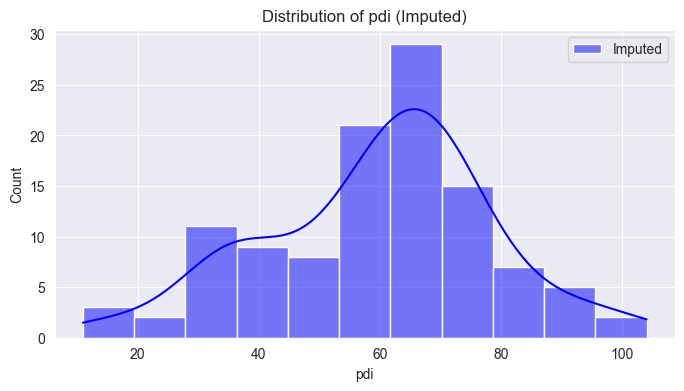

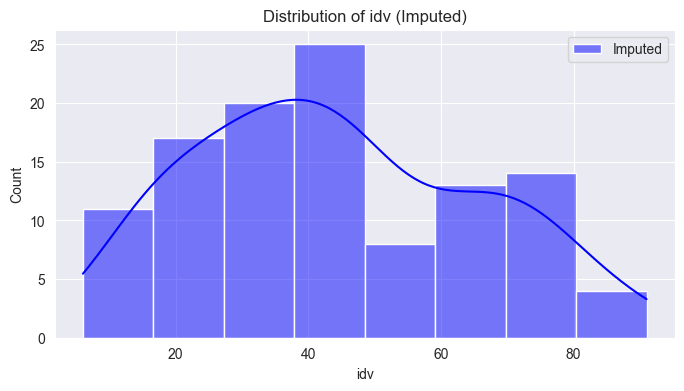

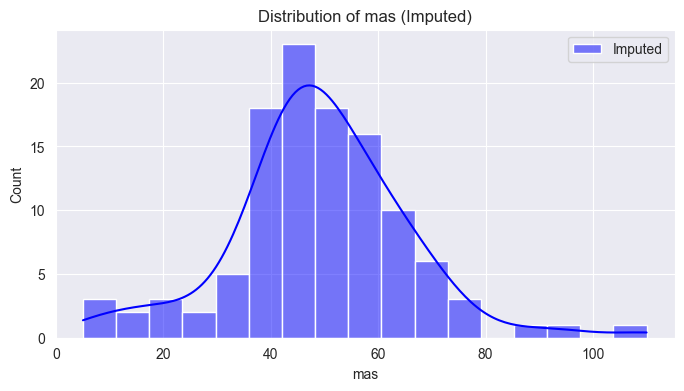

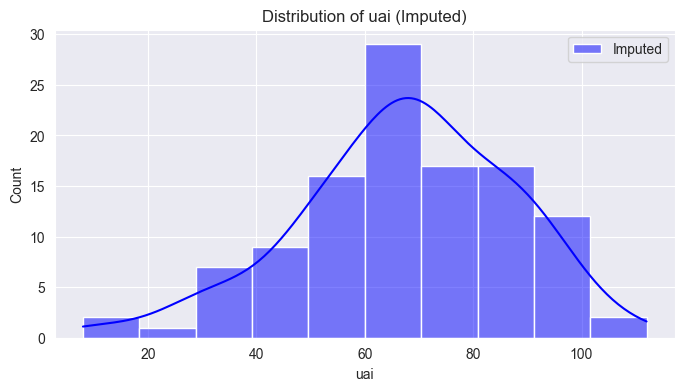

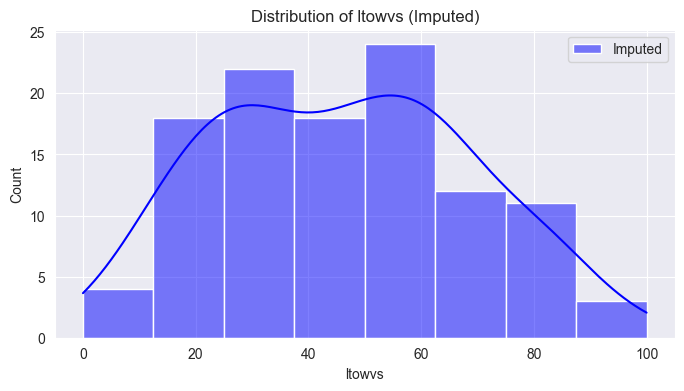

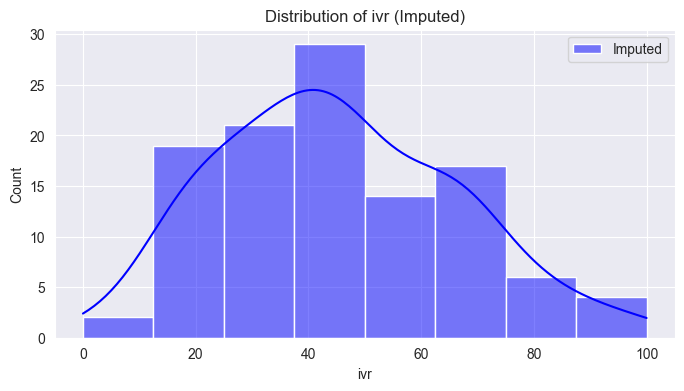

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in columns_to_impute:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], kde=True, label='Imputed', color='blue')
    plt.title(f'Distribution of {column} (Imputed)')
    plt.legend()
    plt.show()

In [31]:
from sklearn.metrics import mean_squared_error

for column in columns_to_impute:
    # Mask some values as missing for evaluation
    mask = data[column].notnull()
    original_values = data.loc[mask, column]
    imputed_values = imputed_data.loc[mask, column]
    
    mse = mean_squared_error(original_values, imputed_values)
    print(f'Mean Squared Error for {column}: {mse}')

Mean Squared Error for pdi: 0.0
Mean Squared Error for idv: 4.507776601262924e-31
Mean Squared Error for mas: 0.0
Mean Squared Error for uai: 0.0
Mean Squared Error for ltowvs: 0.0
Mean Squared Error for ivr: 4.507776601262924e-31


In [32]:
original_corr = data[columns_to_impute].corr()
imputed_corr = imputed_data[columns_to_impute].corr()

print("Original Correlations:\n", original_corr)
print("Imputed Correlations:\n", imputed_corr)

Original Correlations:
              pdi       idv       mas       uai    ltowvs       ivr
pdi     1.000000 -0.618752  0.115309  0.246992 -0.000510 -0.315642
idv    -0.618752  1.000000  0.074618 -0.194542  0.178951  0.112020
mas     0.115309  0.074618  1.000000 -0.051282  0.032134  0.078250
uai     0.246992 -0.194542 -0.051282  1.000000 -0.056820 -0.115976
ltowvs -0.000510  0.178951  0.032134 -0.056820  1.000000 -0.453294
ivr    -0.315642  0.112020  0.078250 -0.115976 -0.453294  1.000000
Imputed Correlations:
              pdi       idv       mas       uai    ltowvs       ivr
pdi     1.000000 -0.618752  0.115309  0.246992 -0.000510 -0.315642
idv    -0.618752  1.000000  0.074618 -0.194542  0.178951  0.112020
mas     0.115309  0.074618  1.000000 -0.051282  0.032134  0.078250
uai     0.246992 -0.194542 -0.051282  1.000000 -0.056820 -0.115976
ltowvs -0.000510  0.178951  0.032134 -0.056820  1.000000 -0.453294
ivr    -0.315642  0.112020  0.078250 -0.115976 -0.453294  1.000000
